## Load and explore the data

### Import libraries

In [25]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

In [26]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Load the data

##### Load the EdGap data set

In [27]:
import pandas as pd

edgap = pd.read_excel(
    'https://raw.githubusercontent.com/benjaminjonjessop/education/main/data/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

/Users/jessopb/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



##### Load the school information data

In [28]:
import pandas as pd

school_information = pd.read_csv(
    'https://github.com/benjaminjonjessop/education/raw/refs/heads/main/data/ccd_sch_029_1617_w_1a_11212017.csv',
    encoding="unicode_escape"
)


/var/folders/w2/lcc2w2s94195l_lxq2ln21c40000gq/T/ipykernel_21162/4088559181.py:3: DtypeWarning:

Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.



##### Load the ACS 2013-2017 Subject Table S2801: Percentage of households with no internet by state

In [29]:
import pandas as pd
import requests

url = "https://api.census.gov/data/2017/acs/acs5/subject"
params = {
    "get": "NAME,S2801_C02_013E",  # percent without an internet subscription
    "for": "state:*"
}

r = requests.get(url, params=params)
data = r.json()
acs = pd.DataFrame(data[1:], columns=data[0])
acs = acs.rename(columns={
    "S2801_C02_013E": "pct_no_internet",
    "state": "STATE_FIPS"
})
acs["pct_no_internet"] = acs["pct_no_internet"].astype(float)


In [30]:
acs.head()

,NAME,pct_no_internet,STATE_FIPS
0,Mississippi,0.7,28
1,Missouri,0.7,29
2,Montana,1.1,30
3,Nebraska,0.8,31
4,Nevada,0.6,32


###### Add mapping of state FIPS to abbreviation

In [31]:
fips_map = {
    "01":"AL","02":"AK","04":"AZ","05":"AR","06":"CA","08":"CO","09":"CT","10":"DE",
    "11":"DC","12":"FL","13":"GA","15":"HI","16":"ID","17":"IL","18":"IN","19":"IA",
    "20":"KS","21":"KY","22":"LA","23":"ME","24":"MD","25":"MA","26":"MI","27":"MN",
    "28":"MS","29":"MO","30":"MT","31":"NE","32":"NV","33":"NH","34":"NJ","35":"NM",
    "36":"NY","37":"NC","38":"ND","39":"OH","40":"OK","41":"OR","42":"PA","44":"RI",
    "45":"SC","46":"SD","47":"TN","48":"TX","49":"UT","50":"VT","51":"VA","53":"WA",
    "54":"WV","55":"WI","56":"WY"
}
acs["STATE"] = acs["STATE_FIPS"].map(fips_map)

In [32]:
acs.head()

,NAME,pct_no_internet,STATE_FIPS,STATE
0,Mississippi,0.7,28,MS
1,Missouri,0.7,29,MO
2,Montana,1.1,30,MT
3,Nebraska,0.8,31,NE
4,Nevada,0.6,32,NV


### Explore the contents of the data sets

##### Start by looking at the head of each data frame

In [33]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [34]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [35]:
pd.set_option('display.max_columns', None)

school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


##### Use the `info` method to check the data types, size of the data frame, and the numbers of missing values

In [36]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [37]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [38]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             52 non-null     object 
 1   pct_no_internet  52 non-null     float64
 2   STATE_FIPS       52 non-null     object 
 3   STATE            51 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


### Summary

###### 1. The school information data set is much larger than the EdGap data set. Clearly the EdGap data set does not include all schools. The ACS table only includes the relevant metric.
###### 2. There are missing values in each of the data sets.
###### 3. Each data set is in a tidy, or long, format.
###### 4. The data types for the variables of interest look correct, but the school identifier is an `object` in the EdGap data set and a `float64` in the school information data set.

## Are the data suitable for answering the question?

###### We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

###### Make a pair plot to explore relationships between the variables.

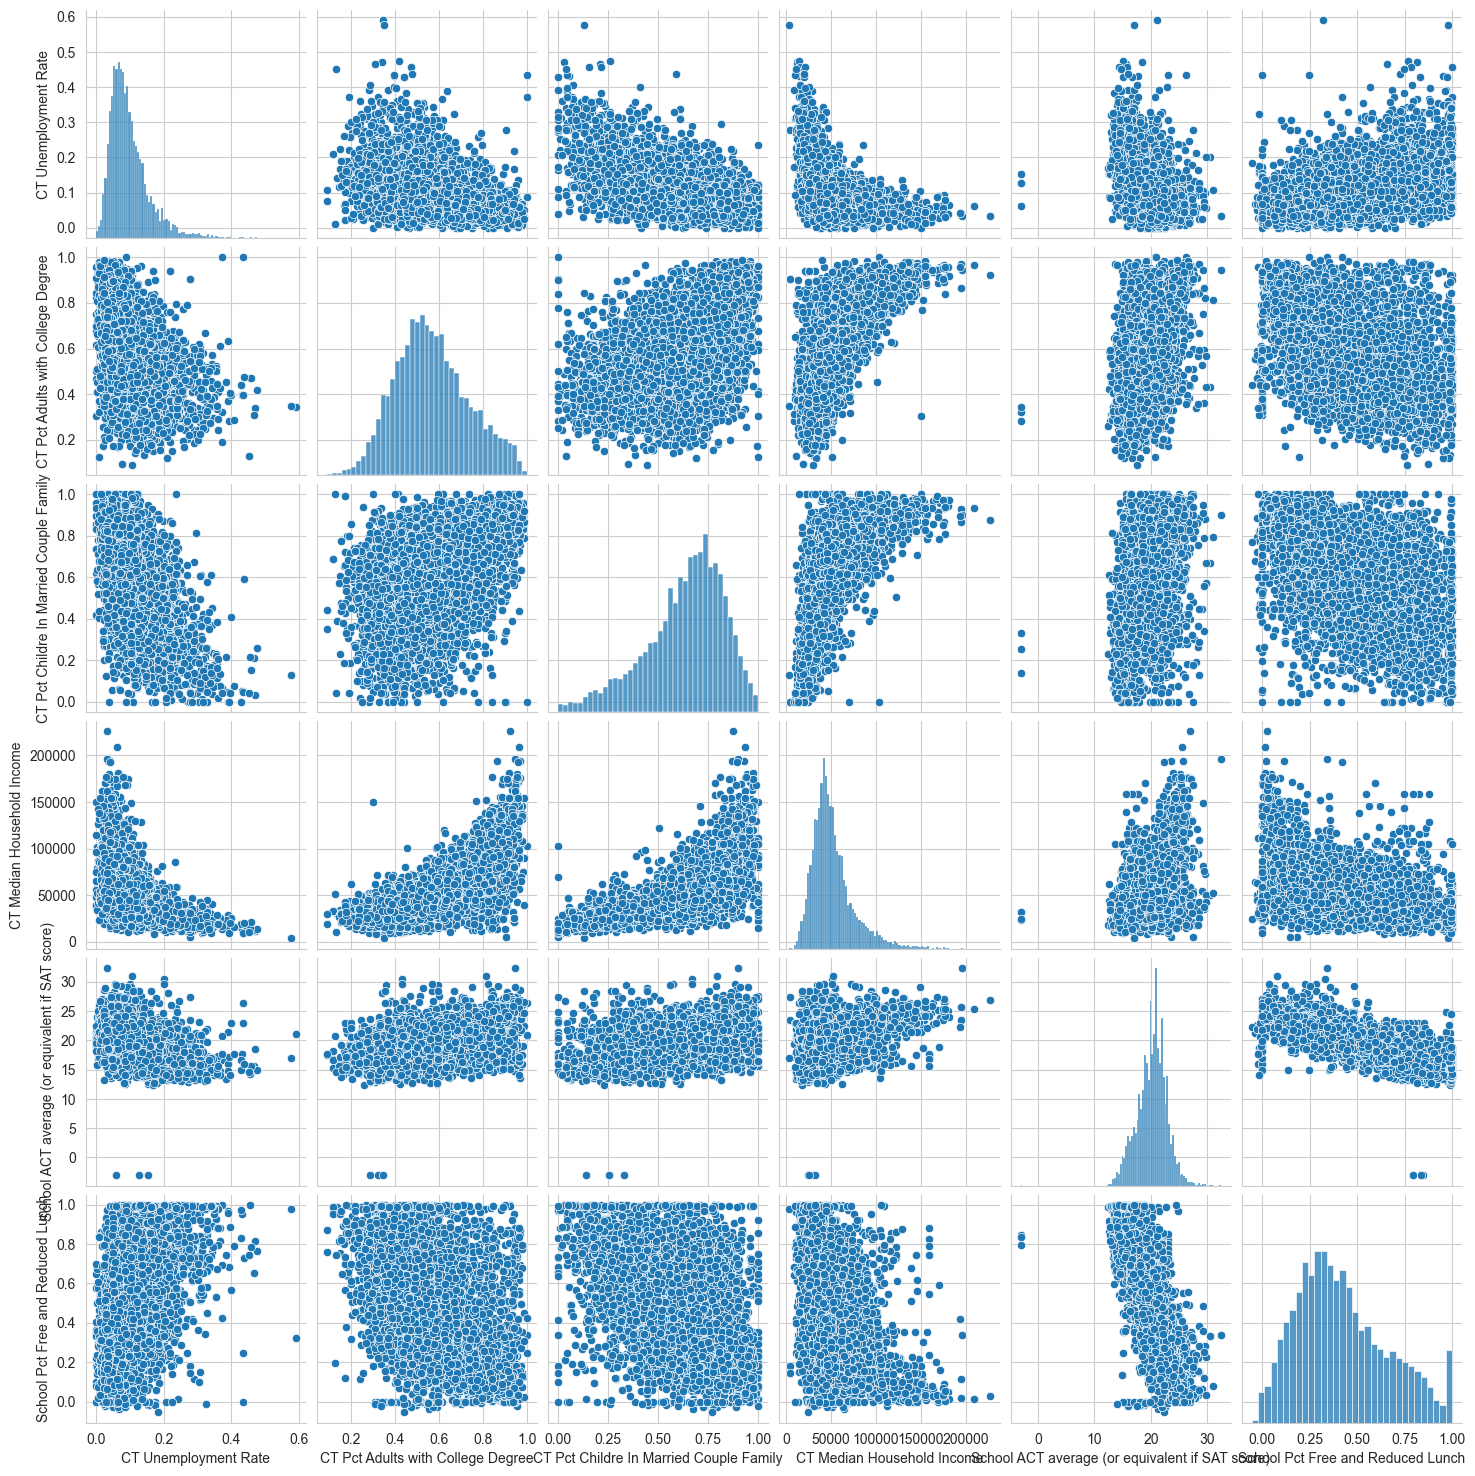

In [39]:
sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
);
plt.show()

###### Add regression lines and format the pair plot

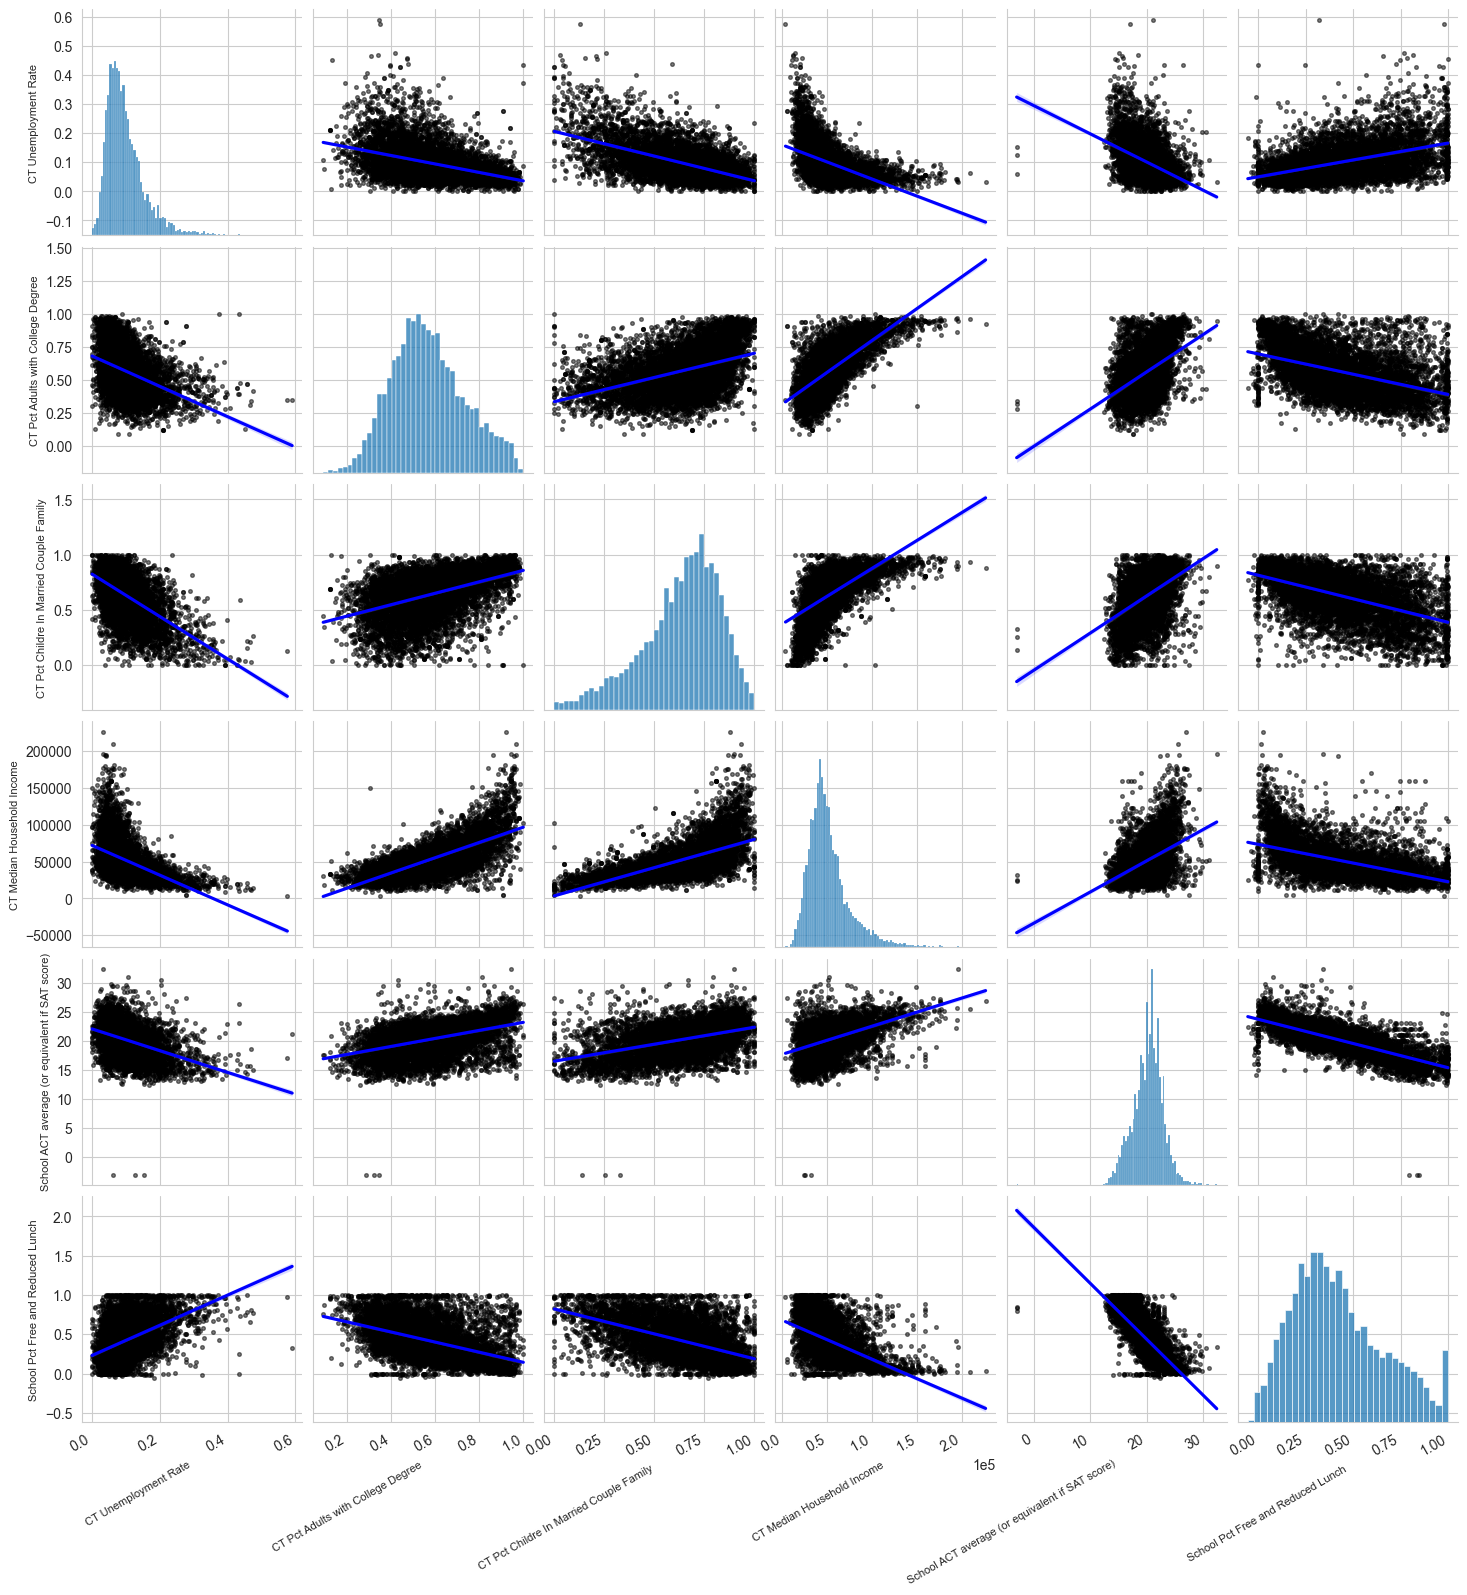

In [40]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

###### Plot a single row

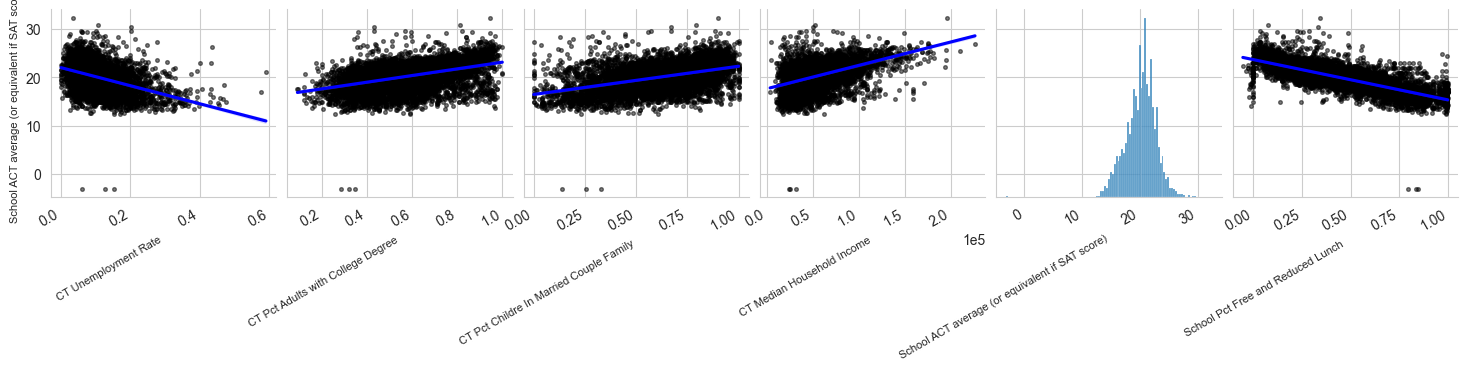

In [41]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

###### Create a choropleth map to show each state shaded by the % of households with no internet access

In [42]:
import pandas as pd
import plotly.express as px

# assuming your dataframe is called acs, with columns 'STATE' (e.g., "WA", "CA") and 'pct_no_internet'
fig = px.choropleth(
    acs,
    locations='STATE',
    locationmode='USA-states',
    color='pct_no_internet',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'pct_no_internet': '% without Internet'},
    title='Percent of Households Without Internet Access (ACS 2013–2017)'
)
fig.show()


### Summary

###### 1. There appears to be a relationship between the socioeconomic variables and the ACT score.
###### 2. There are some out-of-range ACT and percent lunch values that we'll need to deal with.
###### 3. The choropleth indicates the data is generally trustworthy and shows some variation across states.
###### 4. We should have confidence that it is worthwhile to spend time preparing the data for analysis.

## Data preparation

### Select relevant subsets of the data

###### The school information data set contains many columns. We only need the year, school identity, location, and school type information.
###### Keep the columns `SCHOOL_YEAR`, `NCESSCH`, `LSTATE`, `LZIP`, `SCH_TYPE_TEXT`, `LEVEL`, `CHARTER_TEXT`

In [43]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [44]:
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


### Rename columns

###### We will rename the columns to follow best practices of style and being informative.

In [45]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

###### Raname the columns `SCHOOL_YEAR`, `NCESSCH`, `LSTATE`, `LZIP`, `SCH_TYPE_TEXT`, `LEVEL`, `CHARTER_TEXT` to `year`, `id`, `state`, `zip_code`, `school_type`, `school_level`, `charter`

In [46]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [47]:
acs = acs.rename(
    columns={
        "NAME": "state_name_full",
        "pct_no_internet": "pct_no_internet",
        "STATE_FIPS": "state_fips",
        "STATE": "state",
    }
)

#### Summary

###### 1. We selected a subset of columns of the school information data set
###### 2. We renamed the columns for clarity and to follow formatting guidelines
###### 3. We are ready to join the data frames.

### Join data frames

###### We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity. The value is an `object` in the EdGap data set and a `float64` in the school information data set.
###### We will cast the `id` column in the `school_information` DataFrame as an `object`.

In [48]:
 school_information['id'] = school_information['id'].astype('object')

In [49]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


###### Join the data frames and call the result `df`

In [124]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [125]:
df = df.merge(
    acs[['state', 'pct_no_internet']],
    how='left',
    on='state'
)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
 13  pct_no_internet    7986 non-null   float64
dtypes: float64(7), object(7)
memory usage: 873.6+ KB


#### Summary

###### 1. We joined the school data sets using the school id as the key, and then the acs data set using the state as the key.
###### 2. We first cast the id as an object to have the same data type for the key in each data set.
###### 3. We used a left join for both joins to keep all EdGap data.

## Quality control

###### There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.
###### We can use the `describe` method to compute descriptive statistics.

In [127]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,pct_no_internet
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651,0.632457
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754,0.127589
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545,0.400000
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501,0.500000
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570,0.600000
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447,0.700000
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729,1.000000


###### or use the `min` and `max`

In [128]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,pct_no_internet
min,0.00,0.09,0.0,3589.0,-3.07,-0.05,0.4
max,0.59,1.00,1.0,226181.0,32.36,1.00,1.0


###### Set out-of-range values to `NaN` using `np.nan`

In [129]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [130]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

###### Check the types, levels, and charter status of schools

In [131]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [132]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [133]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

###### Keep only the high schools

In [134]:
df = df.loc[df['school_level'] == 'High']

###### Check for any duplicated rows

In [135]:
df.duplicated().sum()

np.int64(0)

### Identify missing values

###### How many values of each variable are missing?

In [137]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


###### What percentage of values of each variable are missing?

In [138]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


###### What states do we have data from?

In [139]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [140]:
df['state'].nunique()

20

###### Plot the results on a choropleth

In [141]:
import plotly.offline as po
import plotly.graph_objs as pg

In [142]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

###### We are missing a large amount of USA data due to omission.

###### Drop the rows where the average ACT score is missing

In [143]:
df = df.dropna(subset=['average_act'])

In [144]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


###### If we drop rows that have `NaNs` for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

#### Summary

###### 1. We set out-of-range values to `NaN` and will impute them.
###### 2. We kept only high schools.
###### 3. We removed schools where we do not have the ACT score.
###### 4. Many schools are missing from the data by omissions.
###### 5. We will imput missing values of socioeconomic variables.

## Data imputation

###### Define the predictor variables to be `rate_unemployment`, `percent_college`, `percent_married`, `median_income`, `percent_lunch`, `state`, `charter`, and `pct_no_internet`.

In [145]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter',
    'pct_no_internet',
]

###### Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [146]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [147]:
imputer = IterativeImputer()

###### Fit the imputer using the numerical predictor variables. Define the columns we want to use in the imputation process.

In [148]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'pct_no_internet']


###### Fit the imputer

In [149]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

###### Impute the missing values in the training data

In [150]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

###### Check for missing values

In [151]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


Export the clean data set

In [152]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

#### Summary
###### 1. We used an iterative imputer to estimate missing values of numerical predictor variables
###### 2. We saved the clean data frame as a csv file.

## Import libraries

In [77]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## Load clean data
### Load the data

In [78]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/benjaminjonjessop/education/refs/heads/main/data/education_clean.csv'
)

In [79]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


## Exploratory data analysis

### Examine distributions and relationships

###### Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables

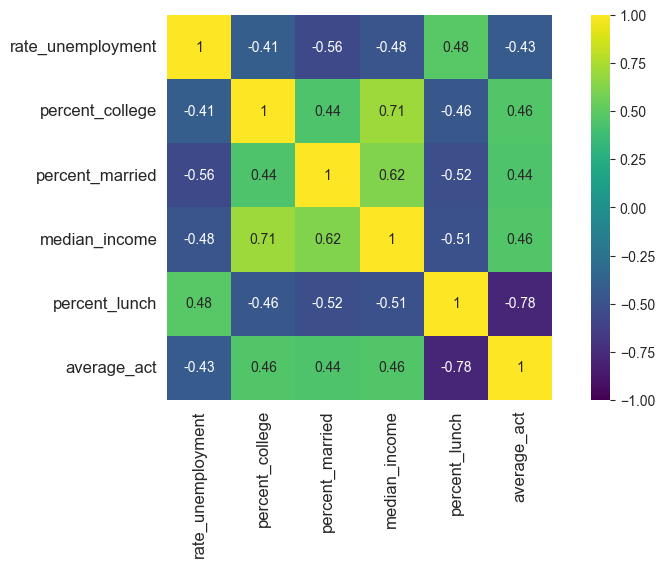

In [80]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

###### Make pair plots to explore relationships between the variables

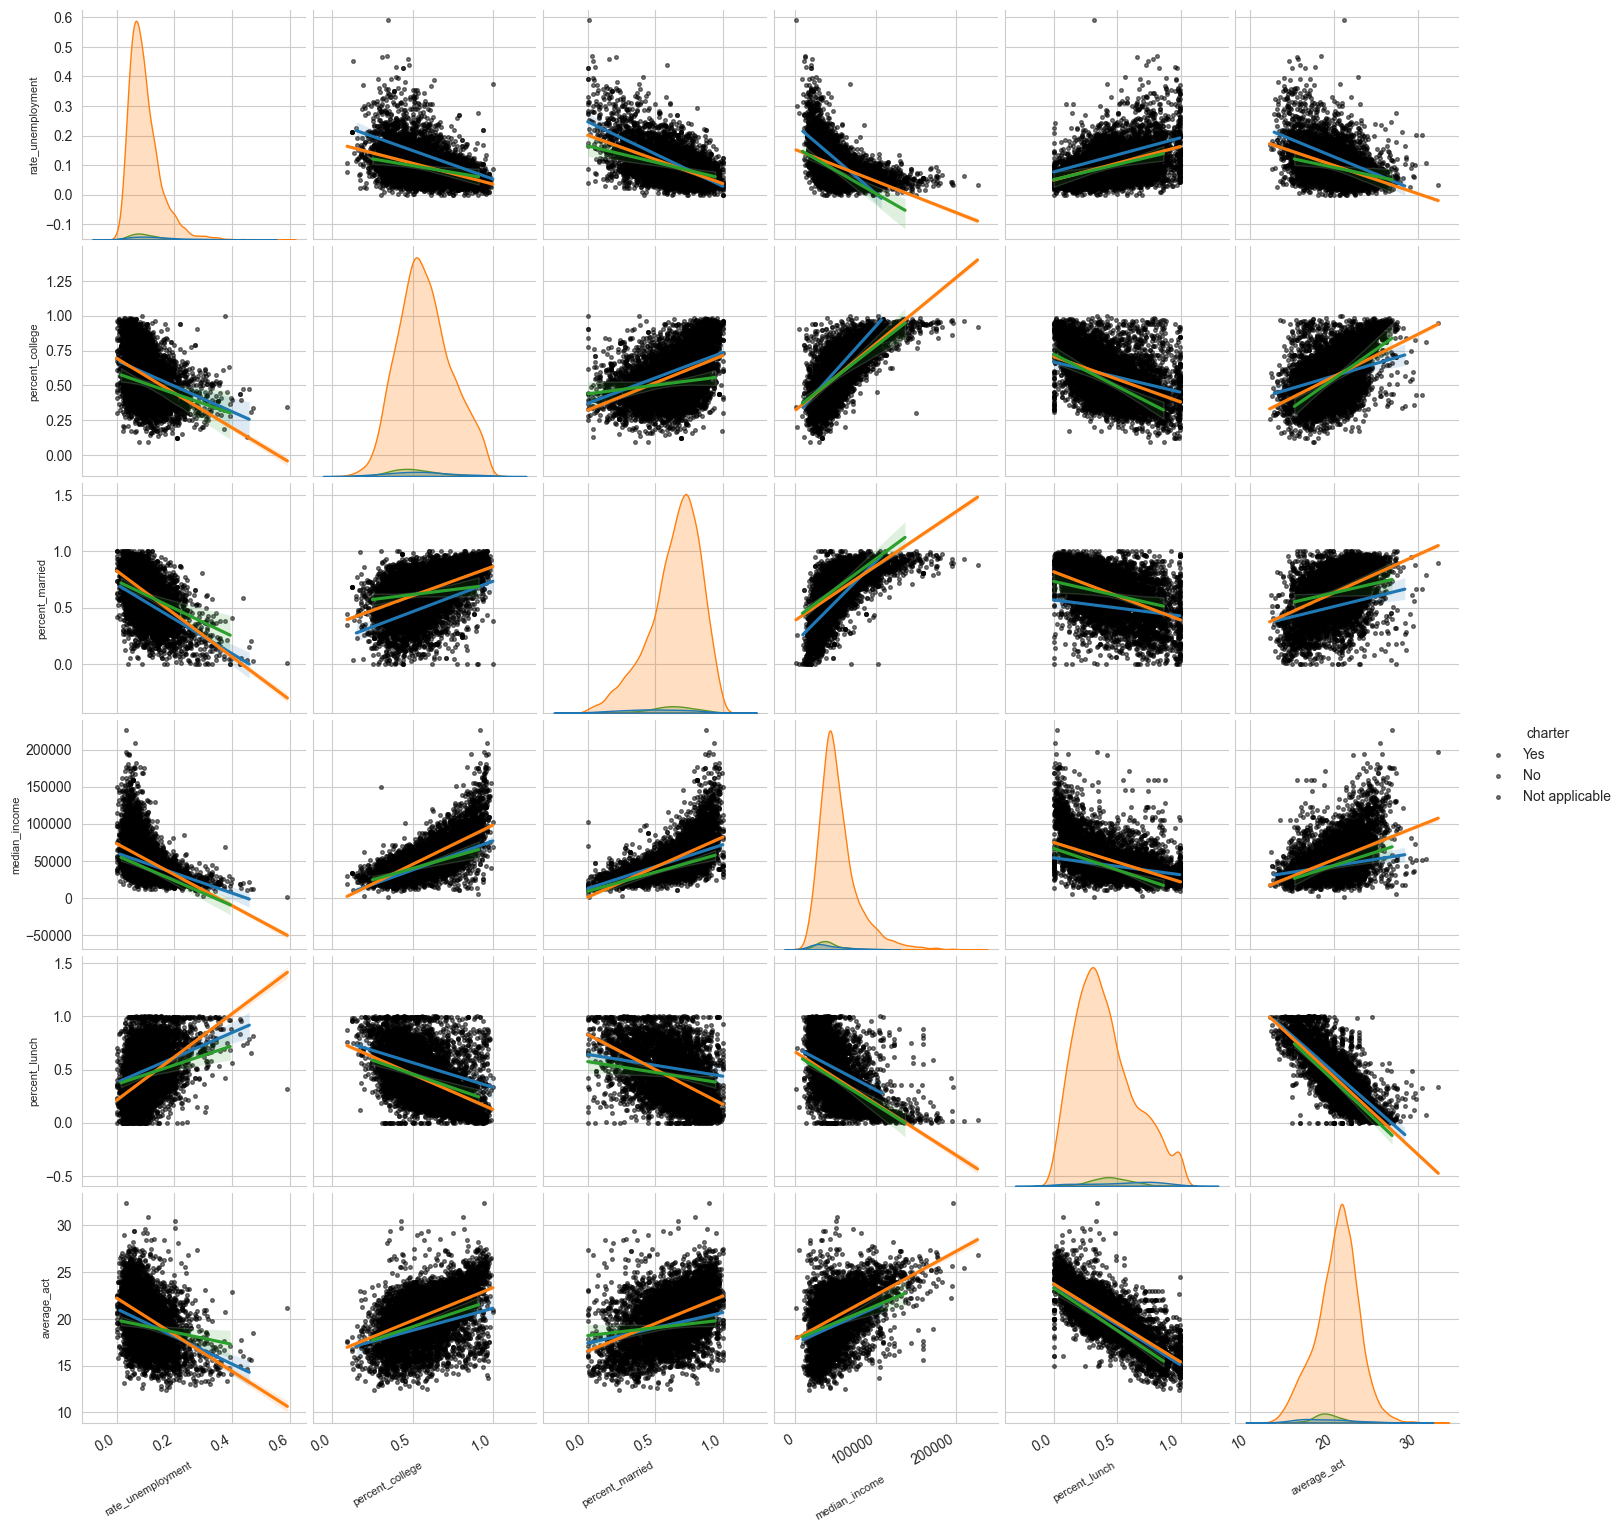

In [81]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

### Identify outliers

###### We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

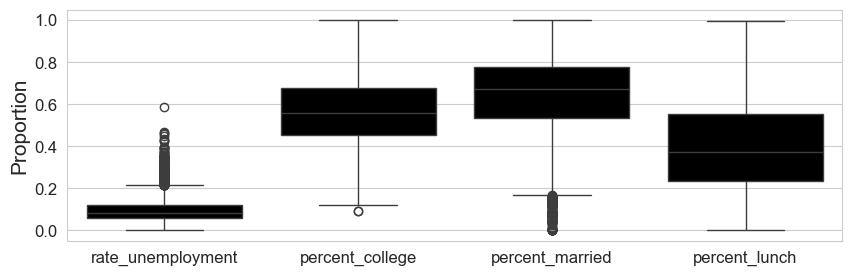

In [82]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

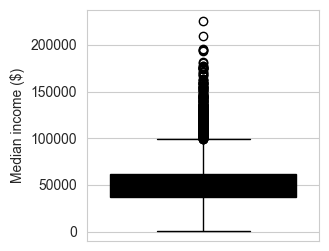

In [83]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

### Summary

###### 1. The numerical predictors are related to `average_act`. The relationships appear roughly linear.
###### 2. The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.
###### 3. Some variables have skewed distributions, suggesting that transformations of input variables might be useful.
###### 4. There are outliers in `rate_unemployment`, `percent_college`, `percent_married` and `median_income`. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.
###### 5. The relationships are similar across charter and non-charter schools, but might be significantly different.

## Modeling

### Single input models

###### Fit and assess models predicting the average ACT score from each of the input variables.

#### Median income

###### Plot the regression line and the scatter plot

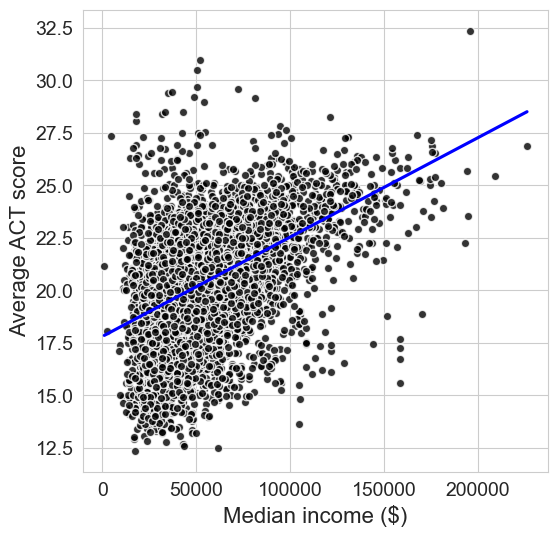

In [84]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

###### Fit the simple linear regression model

In [85]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

In [86]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:36   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

#### Numerical assessment of fit accuracy

###### Compute the R-squared

In [87]:
model_median_income.rsquared

np.float64(0.21118648979300825)

###### Compute the RMSE

In [88]:
y_hat = model_median_income.predict()

In [89]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

###### Compute the mean absolute error

In [90]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688626

###### Use a residual plt for graphical assessment of model fit

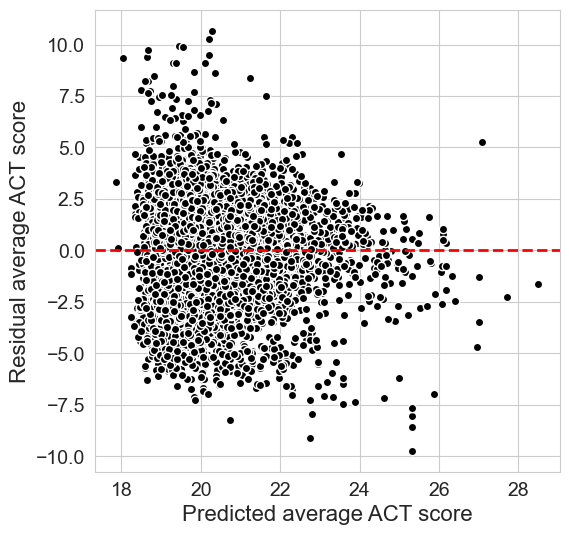

In [91]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

###### Try a quadratic model. Plot the regression cuerves and the scatter plot.

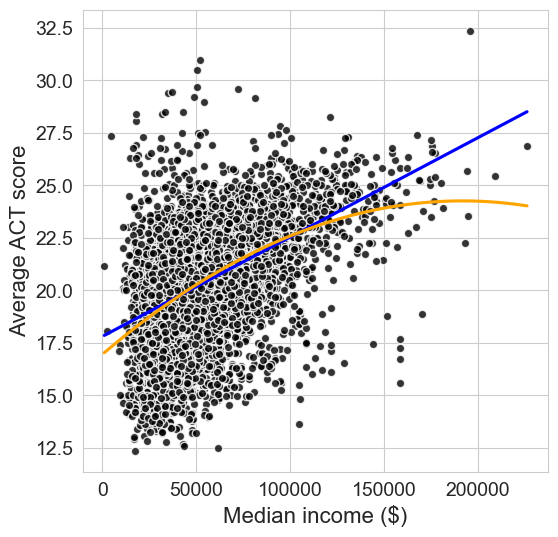

In [92]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

###### Fit a quadratic linear regression model

In [93]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df).fit()

In [94]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:36   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

###### Assess the model significance

In [95]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

In [96]:
anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35865.012794,0.0,NaN,NaN,NaN
1,7224.0,35505.105960,1.0,359.906834,73.227974,1.395848e-17


###### Assess the model accuracy

###### Compute the mean absolute error and compare to the first order model

In [97]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389258000675

In [98]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688626

## Multiple linear regression

###### Fit the multiple linear regression model using all socioeconomic variables as predictors

In [99]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data=df).fit()

###### Print the summary

In [100]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:37   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

###### Use a residual plot for graphical assessment of model fit

In [101]:
y_hat = model.predict()

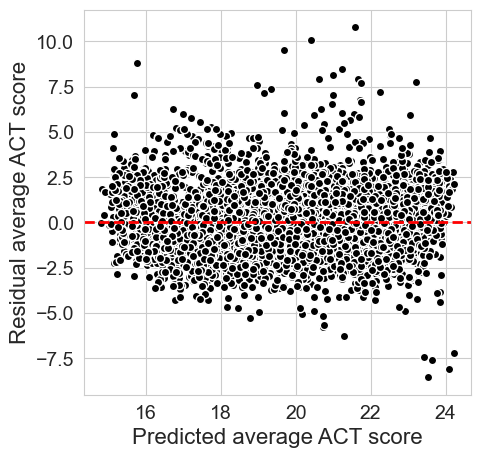

In [102]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [103]:
###### Compute the mean absolute error

In [104]:
mean_absolute_error(df['average_act'], y_hat)

1.145330478887117

#### Summary

###### 1. The multiple linear regression model with all socioeconomic predictors can predict ACT scores with an average error of roughly 1 point using these predictors.

###### 2. The residual plot suggests that there will be limited improvement from adding transformations of these predictors.

###### 3. Not all predictors have significant coefficients.

###### 4. Adding predictors to the model may improve the performance.

## Fit a reduced model with the significant predictors

In [105]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch',
    data=df).fit()

###### Print the summary

In [106]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:37   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

###### Use a residual plot for graphical assessment of model fit

In [107]:
y_hat = model_reduced.predict()

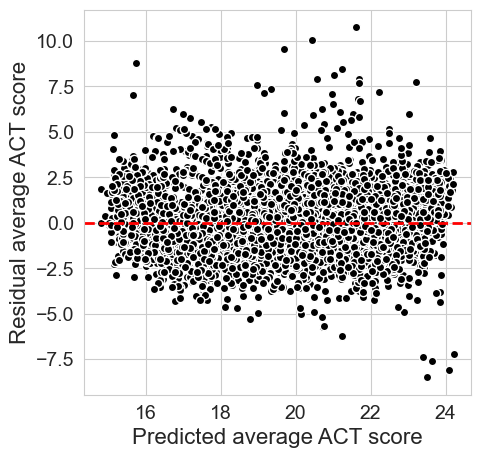

In [108]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

###### Compute the mean absolute error

In [109]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.145483295034637

###### Compare the accuracy between full and reduced models

In [110]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
full model,1.1453,0.6280
reduced model,1.1455,0.6279


Use an ANOVA to test the significance of difference between models

In [111]:
anova_lm(model_reduced, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7223.0,16916.619167,0.0,NaN,NaN,NaN
1,7221.0,16915.612457,2.0,1.006711,0.214874,0.806648


#### Summary

###### 1. The model predicting the average ACT score from `rate_unemployment`, `percent_college` and, `percent_lunch` is not significantly different than the model with all five socioeconomic variables as predictors.
###### 2. Adding predictors to the model may improve the performance.
###### 3. We have not yet determined the relative importance of each predictor in the model.

## Scaling

###### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame

In [112]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [113]:
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [114]:
scaler = StandardScaler().fit(df[predictor_variables])

In [115]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

###### Check the mean and standard deviation of the transformed data

In [116]:
df[scaled_columns].agg(['mean', 'std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0


###### Fit the multiple linear regression model with the normalized predictors

In [117]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

Print the summary

In [118]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:37   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

###### Compare the accuracy between the original and normalized models

In [119]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
normalized model,1.1455,0.6279
reduced model,1.1455,0.6279


#### Summary
###### The percentage of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis